## Preparing the tools

In [2]:
#Install SMOGN
!pip install smogn

In [4]:
# Install xgboost
!pip install xgboost

In [6]:
# Install imblearn
!pip install imblearn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [10]:
# Import all the tools needed

import numpy as np
import pandas as pd
import calendar

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost.XGBRegressor
# from sklearn.svm import LinearSVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# from imblearn.over_sampling import SMOTENC
import smogn
from pylab import rcParams
from math import sqrt
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

## Load data

In [12]:
# asthma_admission_data = pd.read_csv("data/processed_admission_data.csv")
asthma_admission_data = pd.read_csv("data/processed_admission_data_beforeOHE.csv")
asthma_admission_data.shape

(10833, 9)

In [13]:
asthma_admission_data.head(5)

,Admit Day of Week,Age,Gender Desc,Smoker Flag,LOS,Diag Code,Admit Month,Ethnicity Group,DHB Group
0,Mon,44,0,0,0,J459,Aug,European,Auckland
1,Fri,60,0,0,3,J459,May,Pacific Peoples,Auckland
2,Tue,42,1,0,34,J459,Apr,Asian,Auckland
3,Sat,31,0,0,2,J459,Jun,European,Auckland
4,Tue,70,0,0,6,R060,Feb,Maori,Auckland


In [14]:
asthma_admission_data.columns

Index(['Admit Day of Week', 'Age', 'Gender Desc', 'Smoker Flag', 'LOS',
       'Diag Code', 'Admit Month', 'Ethnicity Group', 'DHB Group'],
      dtype='object')

In [15]:
asthma_admission_data['LOS'].describe()

count    10833.000000
mean         2.150374
std          4.667687
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         44.000000
Name: LOS, dtype: float64

In [6]:
asthma_admission_data['LOS'].value_counts()

0     4623
1     3198
2      898
3      501
4      284
5      230
6      171
7      151
8      104
9       94
10      58
11      52
12      45
13      44
15      39
14      32
16      29
19      28
17      25
18      23
22      22
20      20
21      17
23      15
28      13
24      13
26      12
29      10
25       9
30       9
31       8
27       8
34       7
42       6
32       5
38       4
36       4
37       4
33       3
44       3
35       3
40       3
39       2
43       2
41       2
Name: LOS, dtype: int64

### Eliminating instances with <b>zero</b> days

In [16]:
# asthma_admission_data_copy = asthma_admission_data.copy()
asthma_admission_data.drop(asthma_admission_data[asthma_admission_data['LOS']==0].index, axis=0, inplace=True)
asthma_admission_data.head(5)

,Admit Day of Week,Age,Gender Desc,Smoker Flag,LOS,Diag Code,Admit Month,Ethnicity Group,DHB Group
1,Fri,60,0,0,3,J459,May,Pacific Peoples,Auckland
2,Tue,42,1,0,34,J459,Apr,Asian,Auckland
3,Sat,31,0,0,2,J459,Jun,European,Auckland
4,Tue,70,0,0,6,R060,Feb,Maori,Auckland
7,Sat,48,0,0,2,R05,Jun,Asian,Waitemata


In [17]:
asthma_admission_data.shape

(6210, 9)

In [18]:
asthma_admission_data["LOS"].sort_values().value_counts()

1     3198
2      898
3      501
4      284
5      230
6      171
7      151
8      104
9       94
10      58
11      52
12      45
13      44
15      39
14      32
16      29
19      28
17      25
18      23
22      22
20      20
21      17
23      15
24      13
28      13
26      12
29      10
25       9
30       9
27       8
31       8
34       7
42       6
32       5
36       4
37       4
38       4
33       3
35       3
40       3
44       3
39       2
41       2
43       2
Name: LOS, dtype: int64

### Eliminating records with LOS > 14

In [20]:
# asthma_admission_data_copy = asthma_admission_data.copy()
asthma_admission_data.drop(asthma_admission_data[asthma_admission_data["LOS"]>14].index, axis=0, inplace=True)
len(asthma_admission_data)

5862

In [21]:
asthma_admission_data["LOS"].value_counts()

1     3198
2      898
3      501
4      284
5      230
6      171
7      151
8      104
9       94
10      58
11      52
12      45
13      44
14      32
Name: LOS, dtype: int64

In [60]:
asthma_admission_data.columns

Index(['Admit Day of Week', 'Age', 'Gender Desc', 'Smoker Flag', 'LOS',
       'Diag Code', 'Admit Month', 'Ethnicity Group', 'DHB Group'],
      dtype='object')

## Rename Columns

In [22]:
# Rename Gender Desc
asthma_admission_data.rename(columns={"Gender Desc":"Gender", "Smoker Flag":"Smoker Status", "Diag Code":"Diagnostic Code"}, inplace=True)
asthma_admission_data.columns

Index(['Admit Day of Week', 'Age', 'Gender', 'Smoker Status', 'LOS',
       'Diagnostic Code', 'Admit Month', 'Ethnicity Group', 'DHB Group'],
      dtype='object')

## Preprocess Data

In [23]:
categorical_features = ["Admit Day of Week", "Diagnostic Code", "Admit Month", "Ethnicity Group", "DHB Group"]
ohe = OneHotEncoder(sparse=False)
num_feature = ["Age"]
std_scalar = StandardScaler()
preprocessor = ColumnTransformer(
    transformers = [("categorical", ohe, categorical_features),
                   ("numerical", std_scalar, num_feature)],
    remainder="passthrough")


## Defining `Training` , `Validation` and `Test` sets

In [24]:
# asthma_admission_data = transformed_df_copy.copy()
np.random.seed(42)

# Shuffle the dataset
asthma_admission_data_shuffled = asthma_admission_data.sample(frac=1).reset_index(drop=True)

# Defining X and y
X = asthma_admission_data_shuffled.drop("LOS",axis=1)
y = asthma_admission_data_shuffled["LOS"]

# Defining boundry limits for train and validation sets
train_split = round(0.7*len(asthma_admission_data_shuffled)) #80:20%
# valid_split = round(train_split + 0.15*len(asthma_admission_data_shuffled))

# Splitting into train, val and test sets
X_train, y_train = X[:train_split], y[:train_split]
# X_val, y_val = X[train_split:valid_split], y[train_split:valid_split]
# X_test, y_test = X[valid_split:], y[valid_split:]
X_test, y_test = X[train_split:], y[train_split:]

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((4103, 8), (4103,), (1759, 8), (1759,))

### Sampling training data

In [ ]:
# ## specify phi relevance values
# rg_mtrx = [

#     [35000,  1, 0],  ## over-sample ("minority")
#     [125000, 0, 0],  ## under-sample ("majority")
#     [200000, 0, 0],  ## under-sample
#     [250000, 0, 0],  ## under-sample
# ]

In [40]:
# X_train_sampled = smogn.smoter(data = asthma_admission_data_shuffled[:train_split],
#                               y = 'LOS',
#                               k = 7,
# #                               pert = 0.04,#  the amount of perturbation to apply to the introduction of Gaussian Noise.
#                               samp_method = 'balance', # less ('balance') or more('extreme') sampling
#                               rel_thres = 0.5,
#                               rel_method = 'auto', # specifies how relevant or rare "minority" values in y are determined
#                               rel_xtrm_type = 'high', # indicates which region of the response variable y should be considered rare or a "minority"
#                               rel_coef = 5 # specifies the box plot coefficient used to automatically determine extreme and therefore rare "minority" values in y, when rel_method = 'auto'
#                 )

r_index: 100%|######################################################################| 169/169 [00:00<00:00, 389.15it/s]


In [140]:
len(asthma_admission_data_shuffled[:train_split])

4690

In [42]:
# asthma_admission_data_shuffled[:train_split]["LOS"].describe()

In [142]:
# X_train_sampled.shape

In [43]:
# X_train_sampled["LOS"].describe()

In [44]:
X_train_sampled['LOS']

0       15.0
1       15.0
2       15.0
3       15.0
4       15.0
        ... 
4957     2.0
4960    11.0
4961     1.0
4962     2.0
4965     1.0
Name: LOS, Length: 4506, dtype: float64

In [45]:
# X_train_sampled

In [52]:
X_train_sampled = X_train_sampled.reset_index(drop=True)

In [47]:
## X_train_sampled.drop('index', axis=1, inplace=True)
## X_train_sampled

In [48]:
# X_train_sampled

#### Plot `LOS` distribution

<AxesSubplot:xlabel='LOS', ylabel='Density'>

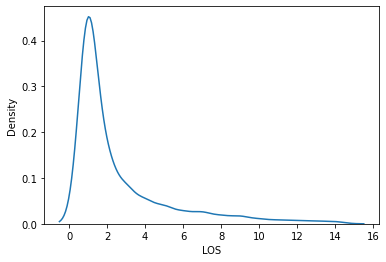

In [26]:
sb.kdeplot(y_train, label='Original',legend=True)
# sb.kdeplot(X_train_sampled['LOS'], label='Sampled')

## Defining a function for evaluting models

### Evaluation metrics cross validation

In [27]:
scoring = ['neg_mean_squared_error','r2','neg_mean_absolute_error']#,'roc_auc']

### Function to print metrics mean values
def print_cv_metrics_mean(metrics):
    print(f"Mean MSE: {metrics['test_neg_mean_squared_error'].mean():.2f}")
    print(f"Mean R2: {metrics['test_r2'].mean():.2f}")
#     print(f"Mean RMSE: {sqrt(metrics['test_neg_mean_squared_error']*(-1)).mean():.2f}%")
    #print(f"Mean F1 Score: {metrics['test_roc_auc'].mean():.2f}")

In [28]:
def evaluate_models (y_true, y_preds):
    """
    Perform evaluation comparison on y_true vs y_preds 
    on a classification
    """
    MSE = mean_squared_error(y_true,y_preds)
    RMSE = mean_squared_error(y_true,y_preds,squared=False)
    R2 = r2_score(y_true,y_preds)
    MAE = mean_absolute_error(y_true,y_preds) 
    #auc = roc_auc_score(y_true,y_preds)
    
    # Building a metrics dictionary and save them for later reference
    metric_dict = {"MSE": round(MSE,2),
                  "RMSE": round(RMSE,2),
                  "R2": round(R2,2),
                  "MAE": round(MAE,2)}
           
    # Printing the metrics values
    print(f"MSE: {MSE:.2f}")
    print(f"RMSE: {RMSE:.2f}")
    print(f"R2: {R2:.2f}")
    print(f"MAE: {MAE:.2f}") 
    
    return metric_dict
    

In [29]:
# Function Generating the ROC curve
def plot_roc_curve(y_test,y_prob_preds):
    fpr, tpr, t = roc_curve(y_test, y_prob_preds)
    auc = roc_auc_score(y_test,y_prob_preds)
    
    # best threshold in ROC
    gmeans = np.sqrt(tpr*(1-fpr))
    ix = np.argmax(gmeans)

    rcParams['figure.figsize'] = 5,5
    plt.rcParams.update({'font.size': 14})

    # Plot ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(round(auc,2)))
    #plt.scatter(fpr[ix],tpr[ix],label='Optimal threshold {%0.5f}'%t[ix], marker='o', color='black')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

## Training model

### Trying classification with few models

In [48]:
# Putting all the classifiers into a dictionary
models = {"Linear Regression": LinearRegression(),
#           "Gaussain Naive Bayes": GaussianNB(),
         "KNN":KNeighborsClassifier(),
         "SVM":SVR(),
         "Random Forest": RandomForestRegressor()}

# Built a function to fit and score the models
def fit_and_score_models(models,X_train,y_train,X_test,y_test):
    """
    Fits and evaluate given machine learning models.
    models :  a dictionary of different Scikit-Learn machine learning models.
    X_train :  training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    np.random.seed(42)
    model_scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [49]:
np.random.seed(42)
# # Shuffle the dataset
# asthma_admission_data_shuffled = asthma_admission_data.sample(frac=1).reset_index(drop=True)

# # Defining X and y
# X = asthma_admission_data_shuffled.drop("LOS Group",axis=1)
# y = asthma_admission_data_shuffled["LOS Group"]

# Calling the above function
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model_scores=fit_and_score_models(models=models,
                     X_train=X_train,
                     y_train=y_train,
                     X_test=X_test, #X_val
                     y_test=y_test) #y_val
model_scores

{'Linear Regression': 0.1439746631455847,
 'KNN': 0.4830917874396135,
 'SVM': 0.03741429951753128,
 'Random Forest': 0.13491050024187035}

### SVM

#### Baseline Model

In [30]:
np.random.seed(42)
model_svm_baseline = SVR()

pipe_svm = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_svm_baseline)])

# model_svm_baseline = TransformedTargetRegressor(regressor=SVR(), transformer=MinMaxScaler())
# pipe = Pipeline(steps=[('sampler', SMOTE()),
#                        ('model',model_svm_baseline),
#                       ],
#                 )
cross_val_scores_svm = cross_validate(pipe_svm,X_train,y_train, cv=5, scoring=scoring, error_score='raise')

# y_preds_svm_baseline = model_svm_baseline.predict(X_test)
# model_metrics_svm_baseline = evaluate_models(y_test,y_preds_svm_baseline)

cross_val_scores_svm

{'fit_time': array([0.64933825, 0.55102324, 0.60623193, 0.57396483, 0.63225818]),
 'score_time': array([0.31766486, 0.3012507 , 0.27405214, 0.28726459, 0.26426959]),
 'test_neg_mean_squared_error': array([-6.60664805, -6.53160897, -7.38378345, -6.43076782, -7.17790397]),
 'test_r2': array([0.06090485, 0.01226228, 0.03767628, 0.03802532, 0.0108531 ]),
 'test_neg_mean_absolute_error': array([-1.49598692, -1.48794367, -1.56969522, -1.48953662, -1.52288137])}

In [31]:
print_cv_metrics_mean(cross_val_scores_svm)

Mean MSE: -6.83
Mean R2: 0.03


In [32]:
model_svm_baseline.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Tuning using RandomizedSearchCV

In [34]:
np.random.seed(42)

# X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2)

model_svm_3 = SVR()
pipe_svm = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_svm_3)])

svm_grid = {"model__C":[0.1,1],
            "model__gamma": ['scale','auto'],
            "model__kernel": ["rbf","poly","sigmoid"],
            "model__degree":[2,3]}


rs_model_svm = RandomizedSearchCV(estimator=pipe_svm,
                                 param_distributions=svm_grid,
                                 n_iter =10,
                                 cv=5,
                                 verbose=2)
# Training models
rs_model_svm.fit(X_train,y_train)

# cross_val_scores_svm_2 = cross_validate(rs_model_svm,X_train,y_train, cv=5, scoring=scoring)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model__C=1, model__degree=3, model__gamma=auto, model__kernel=rbf; total time=   0.5s
[CV] END model__C=1, model__degree=3, model__gamma=auto, model__kernel=rbf; total time=   0.5s
[CV] END model__C=1, model__degree=3, model__gamma=auto, model__kernel=rbf; total time=   0.5s
[CV] END model__C=1, model__degree=3, model__gamma=auto, model__kernel=rbf; total time=   0.5s
[CV] END model__C=1, model__degree=3, model__gamma=auto, model__kernel=rbf; total time=   0.5s
[CV] END model__C=1, model__degree=3, model__gamma=scale, model__kernel=poly; total time=   0.3s
[CV] END model__C=1, model__degree=3, model__gamma=scale, model__kernel=poly; total time=   0.3s
[CV] END model__C=1, model__degree=3, model__gamma=scale, model__kernel=poly; total time=   0.4s
[CV] END model__C=1, model__degree=3, model__gamma=scale, model__kernel=poly; total time=   0.4s
[CV] END model__C=1, model__degree=3, model__gamma=scale, model__kernel=poly

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categorical',
                                                                               OneHotEncoder(sparse=False),
                                                                               ['Admit '
                                                                                'Day '
                                                                                'of '
                                                                                'Week',
                                                                                'Diagnostic '
                                                                                'Code',
                                                                                'Admit '
                                                                                'Month',
                                                                                'Ethnicity '
                                                                                'Group',
                                                                                'DHB '
                                                                                'Group']),
                                                                              ('numerical',
                                                                               StandardScaler(),
                                                                               ['Age'])])),
                                             ('model', SVR())]),
                   param_distributions={'model__C': [0.1, 1],
                                        'model__degree': [2, 3],
                                        'model__gamma': ['scale', 'auto'],
                                        'model__kernel': ['rbf', 'poly',
                                                          'sigmoid']},
                   verbose=2)

In [35]:
rs_model_svm.best_params_

{'model__kernel': 'poly',
 'model__gamma': 'scale',
 'model__degree': 2,
 'model__C': 1}

In [36]:
rs_model_svm.best_score_

0.03172989191184768

#### Tuning using GridSearchCV

In [37]:
np.random.seed(42)
model_svm_4 = SVR()
pipe_svm = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_svm_3)])


svm_gs_grid = {"model__C":[0.1,1],
            "model__gamma": ['scale','auto'],
            "model__kernel": ["rbf","poly","linear"],
            "model__degree":[2,3]}

# X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2)

gs_model_svm = GridSearchCV(estimator=pipe_svm,
                                 param_grid=svm_gs_grid,
                                 cv=5,
                                 verbose=2)
# Training models
gs_model_svm.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__C=0.1, model__degree=2, model__gamma=scale, model__kernel=rbf; total time=   0.5s
[CV] END model__C=0.1, model__degree=2, model__gamma=scale, model__kernel=rbf; total time=   0.5s
[CV] END model__C=0.1, model__degree=2, model__gamma=scale, model__kernel=rbf; total time=   0.5s
[CV] END model__C=0.1, model__degree=2, model__gamma=scale, model__kernel=rbf; total time=   0.5s
[CV] END model__C=0.1, model__degree=2, model__gamma=scale, model__kernel=rbf; total time=   0.6s
[CV] END model__C=0.1, model__degree=2, model__gamma=scale, model__kernel=poly; total time=   0.3s
[CV] END model__C=0.1, model__degree=2, model__gamma=scale, model__kernel=poly; total time=   0.3s
[CV] END model__C=0.1, model__degree=2, model__gamma=scale, model__kernel=poly; total time=   0.3s
[CV] END model__C=0.1, model__degree=2, model__gamma=scale, model__kernel=poly; total time=   0.3s
[CV] END model__C=0.1, model__degree=2, model__gamma

[CV] END model__C=1, model__degree=2, model__gamma=auto, model__kernel=poly; total time=   0.3s
[CV] END model__C=1, model__degree=2, model__gamma=auto, model__kernel=poly; total time=   0.3s
[CV] END model__C=1, model__degree=2, model__gamma=auto, model__kernel=linear; total time=   0.4s
[CV] END model__C=1, model__degree=2, model__gamma=auto, model__kernel=linear; total time=   0.4s
[CV] END model__C=1, model__degree=2, model__gamma=auto, model__kernel=linear; total time=   0.4s
[CV] END model__C=1, model__degree=2, model__gamma=auto, model__kernel=linear; total time=   0.4s
[CV] END model__C=1, model__degree=2, model__gamma=auto, model__kernel=linear; total time=   0.4s
[CV] END model__C=1, model__degree=3, model__gamma=scale, model__kernel=rbf; total time=   0.5s
[CV] END model__C=1, model__degree=3, model__gamma=scale, model__kernel=rbf; total time=   0.6s
[CV] END model__C=1, model__degree=3, model__gamma=scale, model__kernel=rbf; total time=   0.6s
[CV] END model__C=1, model__de

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Admit '
                                                                          'Day '
                                                                          'of '
                                                                          'Week',
                                                                          'Diagnostic '
                                                                          'Code',
                                                                          'Admit '
                                                                          'Month',
                                                                          'Ethnicity '
                                                                          'Group',
                                                                          'DHB '
                                                                          'Group']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['Age'])])),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.1, 1], 'model__degree': [2, 3],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [38]:
gs_model_svm.best_params_

{'model__C': 1,
 'model__degree': 2,
 'model__gamma': 'scale',
 'model__kernel': 'rbf'}

In [39]:
gs_model_svm.best_score_

0.0319443627950821

#### Re-training the best model

In [86]:
np.random.seed(42)

final_model_svm = SVR(C = 1,
                     degree = 2,
                     gamma = "scale",
                     kernel = "rbf")

pipe_svm_final = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",final_model_svm)])

pipe_svm_final.fit(X_train,y_train)
final_y_preds_svm = pipe_svm_final.predict(X_test)
final_model_metrics = evaluate_models(y_test,final_y_preds_svm)
final_model_metrics

# final_y_preds_proba_svm = final_model_svm.predict_proba(X_test)
# plot_roc_curve(y_test,final_y_preds_proba_svm[:,1])
# cross_val_scores_svm_2 = cross_validate(final_model_svm,X,y, cv=5, scoring=scoring)

MSE: 7.03
RMSE: 2.65
R2: 0.05
MAE: 1.50


{'MSE': 7.03, 'RMSE': 2.65, 'R2': 0.05, 'MAE': 1.5}

### RandomForestRegressor

#### Baseline Model

In [41]:
np.random.seed(42)
model_rf_baseline = RandomForestRegressor()
# Creating pipeline
pipe = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_rf_baseline)])

# model_rf_baseline.fit(X_train,y_train)

# y_preds_rf_baseline = model_rf_baseline.predict(X_val)

# model_metrics_rf_baseline = evaluate_models(y_val,y_preds_rf_baseline)

cross_val_scores_rf = cross_validate(pipe,X_train,y_train, cv=5, scoring=scoring, error_score="raise")
cross_val_scores_rf

{'fit_time': array([0.78900743, 0.73131847, 0.69957137, 0.6841743 , 0.78052807]),
 'score_time': array([0.01600027, 0.01698852, 0.02492404, 0.01600051, 0.01599836]),
 'test_neg_mean_squared_error': array([-6.37038119, -6.26878408, -6.98975008, -6.97573907, -7.39373818]),
 'test_r2': array([ 0.09448875,  0.05200777,  0.08903039, -0.0434966 , -0.01888981]),
 'test_neg_mean_absolute_error': array([-1.72379927, -1.71590658, -1.75514413, -1.80950361, -1.81894666])}

In [42]:
model_rf_baseline.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter tuning by Hand

In [16]:
np.random.seed(42)
model_rf_2 = RandomForestClassifier(n_estimators=1000,min_samples_leaf=2, min_samples_split=4,max_features='auto')

# model_rf_2.fit(X_train,y_train)

# y_preds_rf_2 = model_rf_2.predict(X_val)

# model_metrics_rf_2 = evaluate_models(y_val,y_preds_rf_2)

cross_val_scores_rf_2 = cross_validate(model_rf_2,X_train,y_train, cv=5, scoring=scoring)
print_cv_metrics_mean(cross_val_scores_rf_2)

Mean Accuracy: 61.80%
Mean Precision: 64.64%
Mean Recall: 74.35%
Mean F1 Score: 0.69
Mean ROC-AUC: 0.65


Mean Accuracy: 59.08%
Mean Precision: 63.20%
Mean Recall: 70.06%
Mean F1 Score: 0.66
Mean ROC-AUC: 0.62

#### Hyperparameter tuning using RandomizedSearchCV

In [45]:
np.random.seed(42)

# X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2)
model_rf_3 = RandomForestRegressor(n_jobs=-1)
pipe_rf = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_rf_3)])

randomforest_grid = {"model__n_estimators":[100,200,500,1000],
                    "model__max_features": [1,"sqrt"],
                    "model__min_samples_split":[2,4,6],
                    "model__min_samples_leaf":[1,2,4]}

rs_model_rf = RandomizedSearchCV(estimator=pipe_rf,
                                 param_distributions=randomforest_grid,
                                 n_iter =10,
                                 cv=5,
                                 verbose=2)
# Training models
rs_model_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100; total time=   1.7s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100; total time=   0.1s
[CV] END model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500; total time=   0.5s
[CV] END model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500; total time=   0.5s
[CV] END model__

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categorical',
                                                                               OneHotEncoder(sparse=False),
                                                                               ['Admit '
                                                                                'Day '
                                                                                'of '
                                                                                'Week',
                                                                                'Diagnostic '
                                                                                'Code',
                                                                                'Admit '
                                                                                'Month',
                                                                                'Ethnicity '
                                                                                'Group',
                                                                                'DHB '
                                                                                'Group']),
                                                                              ('numerical',
                                                                               StandardScaler(),
                                                                               ['Age'])])),
                                             ('model',
                                              RandomForestRegressor(n_jobs=-1))]),
                   param_distributions={'model__max_features': [1, 'sqrt'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 4, 6],
                                        'model__n_estimators': [100, 200, 500,
                                                                1000]},
                   verbose=2)

In [46]:
rs_model_rf.best_params_

{'model__n_estimators': 500,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 4,
 'model__max_features': 'sqrt'}

In [47]:
rs_model_rf.best_score_

0.1433864842390182

#### Parameter tuning by GridSearchCV

In [48]:
np.random.seed(42)


# X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2)
model_rf_4 = RandomForestRegressor(n_jobs=-1)
pipe_rf_gs = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_rf_4)
                      ]
               )

rf_gs_grid = {"model__n_estimators":[200,500,750],
              "model__max_features": ["log2","sqrt",1],
              "model__min_samples_split":[2,4],
              "model__min_samples_leaf":[1,2,4]}

gs_model_rf = GridSearchCV(estimator=pipe_rf_gs,
                           param_grid=rf_gs_grid,
                           scoring='r2',
                           cv=5,
                           verbose=2)
# Training models
gs_model_rf.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   0.2s
[CV] END model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500; total time=   0.4s
[CV] END model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500; total time=   0.5s


[CV] END model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200; total time=   0.3s
[CV] END model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200; total time=   0.3s
[CV] END model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200; total time=   0.3s
[CV] END model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200; total time=   0.3s
[CV] END model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500; total time=   0.7s
[CV] END model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500; total time=   0.7s
[CV] END model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500; total time=   0.6s
[CV] END model__max_features=log2, model__min_samples_leaf=4, 

[CV] END model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time=   0.3s
[CV] END model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time=   0.3s
[CV] END model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500; total time=   0.8s
[CV] END model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500; total time=   0.9s
[CV] END model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500; total time=   1.2s
[CV] END model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500; total time=   1.1s
[CV] END model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500; total time=   1.0s
[CV] END model__max_features=sqrt, model__min_samples_leaf=2, 

[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500; total time=   0.9s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500; total time=   0.8s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500; total time=   0.7s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500; total time=   0.8s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500; total time=   0.8s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=750; total time=   1.1s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=750; total time=   1.1s
[CV] END model__max_features=1, model__min_samples_leaf=1, model__min_samples_split

[CV] END model__max_features=1, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500; total time=   0.6s
[CV] END model__max_features=1, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500; total time=   0.5s
[CV] END model__max_features=1, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=750; total time=   1.0s
[CV] END model__max_features=1, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=750; total time=   0.9s
[CV] END model__max_features=1, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=750; total time=   0.9s
[CV] END model__max_features=1, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=750; total time=   0.8s
[CV] END model__max_features=1, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=750; total time=   0.8s
[CV] END model__max_features=1, model__min_samples_leaf=4, model__min_samples_split

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Admit '
                                                                          'Day '
                                                                          'of '
                                                                          'Week',
                                                                          'Diagnostic '
                                                                          'Code',
                                                                          'Admit '
                                                                          'Month',
                                                                          'Ethnicity '
                                                                          'Group',
                                                                          'DHB '
                                                                          'Group']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['Age'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_features': ['log2', 'sqrt', 1],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [200, 500, 750]},
             scoring='r2', verbose=2)

In [49]:
gs_model_rf.best_params_

{'model__max_features': 'sqrt',
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 4,
 'model__n_estimators': 200}

In [50]:
gs_model_rf.best_score_

0.14472521986994405

#### Re-train the best model

In [51]:
np.random.seed(42)

final_model_rf = RandomForestRegressor(max_features='sqrt',
                                        min_samples_leaf=4, 
                                        min_samples_split=4, 
                                        n_estimators=200)

pipe = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",final_model_rf)
                      ]
               )

pipe.fit(X_train,y_train)
final_y_preds_rf = pipe.predict(X_test)
final_model_metrics_rf = evaluate_models(y_test,final_y_preds_rf)
# final_model_metrics

# final_y_preds_proba_rf = final_model_rf.predict_proba(X_test)
# plot_roc_curve(y_test,final_y_preds_proba_rf[:,1])

MSE: 6.15
RMSE: 2.48
R2: 0.17
MAE: 1.67


MSE: 6.15
RMSE: 2.48
R2: 0.17
MAE: 1.67

## Permutation feature importance

In [52]:
#%% Feature Permutation Importance
from sklearn.inspection import permutation_importance
plt.rcParams.update({'font.size': 12})
rcParams['figure.figsize'] = 8,5
per_imp = permutation_importance(pipe, X_test, y_test, scoring='r2') #pipe_tune_best
sorted_idx = per_imp.importances_mean.argsort()

Text(0.5, 1.0, 'Feature Importance')

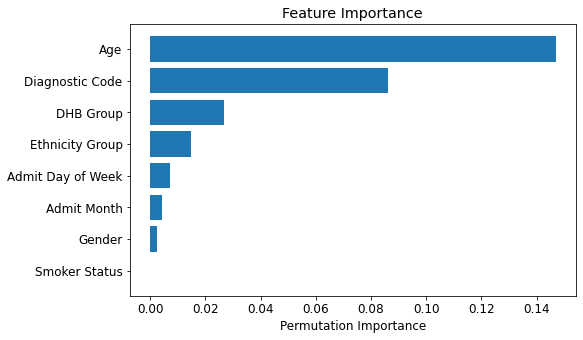

In [54]:
# first_x = sorted_idx[:22]
plt.barh(X_train.columns[sorted_idx], per_imp.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title('Feature Importance')

### Feature Importance

In [102]:
import time
start_time = time.time()
importances = final_model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in final_model_rf.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time for computing feature importance: {elapsed_time:.3f} seconds")

Elapsed time for computing feature importance: 0.027 seconds


In [98]:
X_train.columns

Index(['Admit Day of Week', 'Age', 'Gender', 'Smoker Status',
       'Diagnostic Code', 'Admit Month', 'Ethnicity Group', 'DHB Group'],
      dtype='object')

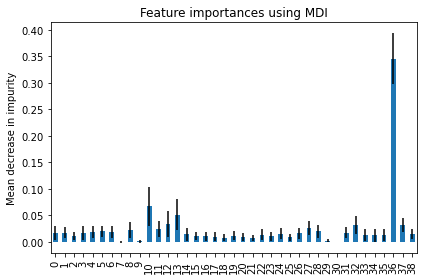

In [103]:
forest_importances = pd.Series(importances) #, index=['Admit Day of Week', 'Age', 'Gender', 'Smoker Status','Diagnostic Code', 'Admit Month', 'Ethnicity Group', 'DHB Group'])
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Linear Regression

#### Baseline Model

In [55]:
np.random.seed(42)

lr_model_baseline = LinearRegression()

pipe_lr = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",lr_model_baseline)
                      ]
               )

# lr_model_baseline.fit(X_train,y_train)
# lr_model_baseline.score(X_val,y_val)

cross_val_scores_lr = cross_validate(pipe_lr,X_train,y_train, cv=5, scoring=scoring)
# print_cv_metrics_mean(cross_val_scores_lr)
cross_val_scores_lr

{'fit_time': array([0.05320978, 0.01052642, 0.00950384, 0.01024532, 0.00999999]),
 'score_time': array([0.00602102, 0.00399995, 0.00400019, 0.00399923, 0.00399995]),
 'test_neg_mean_squared_error': array([-5.6945689 , -5.8289978 , -6.22683493, -5.84089825, -6.35473402]),
 'test_r2': array([0.19055139, 0.11851413, 0.18846063, 0.12626355, 0.12428955]),
 'test_neg_mean_absolute_error': array([-1.65526095, -1.69113029, -1.68886076, -1.69221727, -1.72369474])}

In [56]:
lr_model_baseline.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

### Xtreme Gradient Boosting 

#### Baseline model

In [57]:
np.random.seed(42)
gb_model_baseline = xgboost.XGBRegressor()
pipe_xgb = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",gb_model_baseline)
                      ]
               )

cross_val_scores_gb = cross_validate(pipe_xgb,X_train,y_train, cv=5, scoring=scoring)
print_cv_metrics_mean(cross_val_scores_gb)

Mean MSE: -7.69
Mean R2: -0.09


In [58]:
gb_model_baseline.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Hyperparameter tuning by hand

In [65]:
np.random.seed(42)
gb_model_2 = xgboost.XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=0, max_depth=10, max_leaves=0)
pipe_xgb = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",gb_model_2)
                      ]
               )

cross_val_scores_gb_2 = cross_validate(pipe_xgb,X_train,y_train, cv=5, scoring=scoring)
print_cv_metrics_mean(cross_val_scores_gb_2)

Mean MSE: -7.67
Mean R2: -0.09


#### Hyperparameter tuning by RandomizedSearchCV

In [69]:
model_gb_3 = xgboost.XGBRegressor()
pipe_xgb_gs = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",gb_model_2)
                      ]
               )

gradientBoosting_grid = {"model__eta": [0.01,0.1,0.3],
                    "model__n_estimators":[100,200,500,1000],
                    "model__max_depth":[1,2,5,10],
                    "model__subsample":[0.5,1],
                    "model__colsample_bytree":[0.5,1]}

np.random.seed(42)

# X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3)

rs_model_gb = RandomizedSearchCV(estimator=pipe_xgb_gs,
                                 param_distributions=gradientBoosting_grid,
                                 n_iter =50,
                                 cv=5,
                                 verbose=2)
# Training models
rs_model_gb.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=2, model__n_estimators=100, model__subsam

[CV] END model__colsample_bytree=1, model__eta=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.5; total time=   0.2s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=100, model__subsample=1; total time=   0.0s
[CV] END model__colsamp

[CV] END model__colsample_bytree=1, model__eta=0.01, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=1, model__eta=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1; total time=   0.3s
[CV] END model__colsample_bytree=1

[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=1, model_

[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=5, model__n_estimators=1000, model__subsample=1; total time=   1.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=5, model__n_estimators=1000, model__subsample=1; total time=   1.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categorical',
                                                                               OneHotEncoder(sparse=False),
                                                                               ['Admit '
                                                                                'Day '
                                                                                'of '
                                                                                'Week',
                                                                                'Diagnostic '
                                                                                'Code',
                                                                                'Admit '
                                                                                'Month',
                                                                                'Ethnicity '
                                                                                'Group',
                                                                                'DHB '
                                                                                'Group']),
                                                                              ('numerical',
                                                                               StandardScaler(),
                                                                               ['Age'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           ca...
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=0,
                                                           reg_alpha=None,
                                                           reg_lambda=None, ...))]),
                   n_iter=50,
                   param_distributions={'model__colsample_bytree': [0.5, 1],
                                        'model__eta': [0.01, 0.1, 0.3],
                                        'model__max_depth': [1, 2, 5, 10],
                                        'model__n_estimators': [100, 200, 500,
                                                                1000],
                                        'model__subsample': [0.5, 1]},
                   verbose=2)

In [70]:
rs_model_gb.best_params_

{'model__subsample': 1,
 'model__n_estimators': 200,
 'model__max_depth': 1,
 'model__eta': 0.3,
 'model__colsample_bytree': 0.5}

#### Hyperparameter tuning by GridSearchCV

In [71]:
model_gb_4 = xgboost.XGBRegressor()
pipe_xgb = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_gb_4)
                      ]
               )
gb_gs_grid = {"model__eta": [0.01,0.1,0.3],
                    "model__n_estimators":[150,200,300],
                    "model__max_depth":[1,2,5],
                    "model__subsample":[1],
                    "model__colsample_bytree":[0.5]}

np.random.seed(42)

# X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3)


gs_model_gb = GridSearchCV(estimator=pipe_xgb,
                           param_grid=gb_gs_grid,
                           cv=5,
                           verbose=2)
# Training models
gs_model_gb.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=150, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=150, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=150, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=150, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=150, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=200, mode

[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=1, model__n_estimators=300, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=150, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=150, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=150, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=150, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=150, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=0

[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=300, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=5, model__n_estimators=150, model__subsample=1; total time=   0.4s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=5, model__n_estimators=150, model__subsample=1; total time=   0.4s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=5, model__n_estimators=150, model__subsample=1; total time=   0.3s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=5, model__n_estimators=150, model__subsample=1; total time=   0.3s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=5, model__n_estimators=150, model__subsample=1; total time=   0.3s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=5, model__n_estimators=200, model__subsample=1; total time=   0.4s
[CV] END model__colsample_bytree=0

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Admit '
                                                                          'Day '
                                                                          'of '
                                                                          'Week',
                                                                          'Diagnostic '
                                                                          'Code',
                                                                          'Admit '
                                                                          'Month',
                                                                          'Ethnicity '
                                                                          'Group',
                                                                          'DHB '
                                                                          'Group']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['Age'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callback...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None,
                                                     reg_alpha=None,
                                                     reg_lambda=None, ...))]),
             param_grid={'model__colsample_bytree': [0.5],
                         'model__eta': [0.01, 0.1, 0.3],
                         'model__max_depth': [1, 2, 5],
                         'model__n_estimators': [150, 200, 300],
                         'model__subsample': [1]},
             verbose=2)

In [72]:
gs_model_gb.best_params_

{'model__colsample_bytree': 0.5,
 'model__eta': 0.1,
 'model__max_depth': 1,
 'model__n_estimators': 300,
 'model__subsample': 1}

In [73]:
gs_model_gb.best_score_

0.15059746868790147

#### Re-train the model

In [75]:
np.random.seed(42)
final_model_gb = xgboost.XGBRegressor(ets = 0.1, 
                                            n_estimators = 300,
                                            subsample=1, 
                                            max_depth = 1,
                                            colsample_bytree = 0.5,
                                            random_state=42
                                            )
pipe_xgb_final = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",final_model_gb)
                      ]
               )

pipe_xgb_final.fit(X_train,y_train)
final_y_preds_gb = pipe_xgb_final.predict(X_test)
final_model_metrics_gb = evaluate_models(y_test,final_y_preds_gb)

# final_y_preds_proba_gb = final_model_gb.predict_proba(X_test)
# plot_roc_curve(y_test,final_y_preds_proba_gb[:,1])

[09:21:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "ets" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MSE: 6.26
RMSE: 2.50
R2: 0.16
MAE: 1.67


## KNN

#### Baseline model

In [79]:
np.random.seed(42)
knn_model_baseline = KNeighborsRegressor()
pipe_knn = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",gb_model_baseline)
                      ]
               )

cross_val_scores_knn = cross_validate(pipe_knn,X_train,y_train, cv=5, scoring=scoring)
print_cv_metrics_mean(cross_val_scores_knn)

Mean MSE: -7.69
Mean R2: -0.09


#### Hyperparameter tuning by RandomizedSearchCV

In [81]:
model_gb_3 = KNeighborsRegressor()
pipe_knn_gs = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",gb_model_2)
                      ]
               )

gradientBoosting_grid = {"model__eta": [0.01,0.1,0.3],
                    "model__n_estimators":[100,200,500,1000],
                    "model__max_depth":[1,2,5,10],
                    "model__subsample":[0.5,1],
                    "model__colsample_bytree":[0.5,1]}

np.random.seed(42)

# X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3)

rs_model_knn = RandomizedSearchCV(estimator=pipe_knn_gs,
                                 param_distributions=gradientBoosting_grid,
                                 n_iter =20,
                                 cv=5,
                                 verbose=2)
# Training models
rs_model_knn.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=2, model__n_estimators=500, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=2, model__n_estimators=100, model__subsample=0.5; total time=   0.0s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=2, model__n_estimators=100, model__subsam

[CV] END model__colsample_bytree=1, model__eta=0.01, model__max_depth=5, model__n_estimators=100, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=0.5; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=100, model__subsample=1; total time=   0.0s
[CV] END model__colsamp

[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=1, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=1, model__eta=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=1, model__eta=0.01, model__max_depth=5, model__n_estimators=200, model__subsample=1; total time=   0.2s
[CV] END model__colsample_bytree=1, 

[CV] END model__colsample_bytree=0.5, model__eta=0.01, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.3s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.4s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.4s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.4s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.3s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=1, model__n_estimators=500, model__subsample=1; total time=   0.6s
[CV] END model__colsample_bytree=1, model__eta=0.1, model__max_depth=2, model__n_estimators=1000, model__subsample=0.5; total time=   1.6s
[CV] END model__colsample_bytree=1, model_

[CV] END model__colsample_bytree=0.5, model__eta=0.1, model__max_depth=5, model__n_estimators=1000, model__subsample=1; total time=   1.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.1s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=0.5, model__eta=0.3, model__max_depth=2, model__n_estimators=200, model__subsample=1; total time=   0.0s
[CV] END model__colsample_bytree=1, model__eta=0.01, model__max_depth=10, model__n_estimators=1000, model__subsample=0.5; total time=   5.0s
[CV] END model__colsample_bytr

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categorical',
                                                                               OneHotEncoder(sparse=False),
                                                                               ['Admit '
                                                                                'Day '
                                                                                'of '
                                                                                'Week',
                                                                                'Diagnostic '
                                                                                'Code',
                                                                                'Admit '
                                                                                'Month',
                                                                                'Ethnicity '
                                                                                'Group',
                                                                                'DHB '
                                                                                'Group']),
                                                                              ('numerical',
                                                                               StandardScaler(),
                                                                               ['Age'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           ca...
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=0,
                                                           reg_alpha=None,
                                                           reg_lambda=None, ...))]),
                   n_iter=50,
                   param_distributions={'model__colsample_bytree': [0.5, 1],
                                        'model__eta': [0.01, 0.1, 0.3],
                                        'model__max_depth': [1, 2, 5, 10],
                                        'model__n_estimators': [100, 200, 500,
                                                                1000],
                                        'model__subsample': [0.5, 1]},
                   verbose=2)

#### Hyperparameter tuning by GridSearchCV

In [76]:
model_knn_4 = KNeighborsRegressor()
pipe_knn = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_knn_4)
                      ]
               )
gb_gs_grid = { "model__n_neighbors":[3,5,9],
               "model__p": [1,2],
                "model__weights": ["uniform","distance"],
                "model__algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]
        }

np.random.seed(42)

# X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3)


gs_model_gb = GridSearchCV(estimator=pipe_knn,
                           param_grid=gb_gs_grid,
                           cv=5,
                           verbose=2)
# Training models
gs_model_gb.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__algorithm=auto, model__n_neighbors=3, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=auto, model__n_neighbors=3, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=auto, model__n_neighbors=3, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=auto, model__n_neighbors=3, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=auto, model__n_neighbors=3, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=auto, model__n_neighbors=3, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=auto, model__n_neighbors=3, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=auto, model__n_neighbors=3, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=auto, model__n_neighbors=3, model__p=

[CV] END model__algorithm=ball_tree, model__n_neighbors=3, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=ball_tree, model__n_neighbors=3, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=ball_tree, model__n_neighbors=3, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=ball_tree, model__n_neighbors=3, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=ball_tree, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=ball_tree, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=ball_tree, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=ball_tree, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=ball_tree, model__n_neighbors=5, model__p=1, model__weight

[CV] END model__algorithm=kd_tree, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=kd_tree, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=kd_tree, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.1s
[CV] END model__algorithm=kd_tree, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=kd_tree, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=kd_tree, model__n_neighbors=5, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=kd_tree, model__n_neighbors=5, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=kd_tree, model__n_neighbors=5, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=kd_tree, model__n_neighbors=5, model__p=2, model__weights=distance; total t

[CV] END model__algorithm=brute, model__n_neighbors=9, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=brute, model__n_neighbors=9, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=brute, model__n_neighbors=9, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=brute, model__n_neighbors=9, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__algorithm=brute, model__n_neighbors=9, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=brute, model__n_neighbors=9, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=brute, model__n_neighbors=9, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=brute, model__n_neighbors=9, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__algorithm=brute, model__n_neighbors=9, model__p=2, model__weights=uniform; total time=   0.0s
[CV] E

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Admit '
                                                                          'Day '
                                                                          'of '
                                                                          'Week',
                                                                          'Diagnostic '
                                                                          'Code',
                                                                          'Admit '
                                                                          'Month',
                                                                          'Ethnicity '
                                                                          'Group',
                                                                          'DHB '
                                                                          'Group']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['Age'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                              'brute'],
                         'model__n_neighbors': [3, 5, 9], 'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']},
             verbose=2)

In [77]:
gs_model_gb.best_params_

{'model__algorithm': 'ball_tree',
 'model__n_neighbors': 9,
 'model__p': 2,
 'model__weights': 'uniform'}

In [78]:
gs_model_gb.best_score_

0.04818799230949111

#### Retrain best model

In [82]:
model_knn_4 = KNeighborsClassifier(algorithm = "ball_tree",
                                  n_neighbors = 9,
                                  p = 2,
                                  weights = "uniform")

pipe_knn_best = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_knn_4)
                      ]
               )

np.random.seed(42)

pipe_knn_best.fit(X_train,y_train)
final_y_preds_gb = pipe_knn_best.predict(X_test)
final_model_metrics_gb = evaluate_models(y_test,final_y_preds_gb)


MSE: 9.46
RMSE: 3.08
R2: -0.28
MAE: 1.58


### Neural Network

In [162]:
np.random.seed(42)

nn_model_baseline = MLPRegressor()

pipe_knn_best = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",nn_model_baseline)
                      ]
               )

pipe_knn_best.fit(X_train,y_train)
pipe_knn_best.score(X_test,y_test)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.07331053125001485

In [148]:
nn_model_baseline.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 10, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

#### Parameter tuning by hand

In [155]:
np.random.seed(42)

nn_model_baseline = MLPClassifier(hidden_layer_sizes=(100,0,20), max_iter=500, activation='logistic',solver='adam')

nn_model_baseline.fit(X_train,y_train)
nn_model_baseline.score(X_val,y_val)

0.617508813160987

## Ridge Regression

In [83]:
np.random.seed(42)
r_model_baseline = Ridge()
pipe_r = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",r_model_baseline)
                      ]
               )

cross_val_scores_gb = cross_validate(pipe_r,X_train,y_train, cv=5, scoring=scoring)
print_cv_metrics_mean(cross_val_scores_gb)

Mean MSE: -5.99
Mean R2: 0.15


## Adaboost Regressor

In [85]:
model_ada_baseline = AdaBoostRegressor()
pipe_ada_base = Pipeline(steps=[("preprocess",preprocessor),
                      ("model",model_ada_baseline)
                      ]
               )

np.random.seed(42)

cross_val_scores_gb = cross_validate(pipe_ada_base,X_train,y_train, cv=5, scoring=scoring)
print_cv_metrics_mean(cross_val_scores_gb)

Mean MSE: -6.80
Mean R2: 0.03


# Sensitivity Analysis

In [ ]:
Removing `R062` from the dataset and rerunning the ML models to see whether the inclusion or exclusion of that code afftects the model performance. 

In [84]:
asthma_admission_data_sen = asthma_admission_data.copy()